<a href="https://colab.research.google.com/github/SagarSonar2698/yulu/blob/main/yulu_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

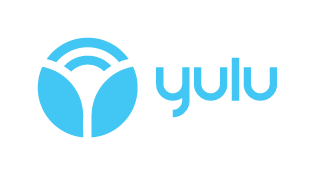

**about Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands
Dataset:

Dataset Link: yulu_data.csv

**Column Profiling:**

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered
Concept Used:

Bi-Variate Analysis
2-sample t-test: testing for difference across populations
ANNOVA
Chi-square
How to begin:

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
Select an appropriate test to check whether:
Working Day has effect on number of electric cycles rented
No. of cycles rented similar or different in different seasons
No. of cycles rented similar or different in different weather
Weather is dependent on season (check between 2 predictor variable)
Set up Null Hypothesis (H0)
State the alternate hypothesis (H1)
Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
Set a significance level (alpha)
Calculate test Statistics.
Decision to accept or reject null hypothesis.
Inference from the analysis
Evaluation Criteria (50 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Hypothesis Testing (30 Points):
2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
Chi-square test to check if Weather is dependent on the season (10 points)
Notebook Quality (10 points):
Structure & Flow
Well commented code
What good looks like (distribution of 10 points):

Visual analysis (1)
Hypothesis formulation (1)
Select the appropriate test (1)
Check test assumptions (2)
Find the p-value(1)
Conclusion based on the p-value (2)

# Importing Liabraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import scipy.stats as stats
warnings.filterwarnings('ignore')

# checking the structure and characterstics of data


In [ ]:
!gdown 1JsV-IBugcJGk_pPnotjRJcSkLxN3uaaJ

Downloading...
From: https://drive.google.com/uc?id=1JsV-IBugcJGk_pPnotjRJcSkLxN3uaaJ
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 101MB/s]


In [ ]:
df = pd.read_csv('/content/yulu.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**so no column has contains null values**

since datetime columns contains dates hence we will convert it into datetime format and At the same time season, holiday, workingday, weather should in object format as they are categorical in nature.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.season = df.season.astype('object')
df.holiday = df.holiday.astype('object')
df.workingday = df.workingday.astype('object')

In [ ]:
df.describe()

,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include = ['object'])

,season,holiday,workingday
count,10886,10886,10886
unique,4,2,2
top,4,0,1
freq,2734,10575,7412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 1020.7+ KB


after comparing mean and median values here we can see no column contains outlier values

# checking duplicate entries

In [ ]:
df[df.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


# Number of unique values in data

In [ ]:
for i in df.columns:
  print(f'{i} has {df[i].nunique()} unique values')

datetime has 10886 unique values
season has 4 unique values
holiday has 2 unique values
workingday has 2 unique values
weather has 4 unique values
temp has 49 unique values
atemp has 60 unique values
humidity has 89 unique values
windspeed has 28 unique values
casual has 309 unique values
registered has 731 unique values
count has 822 unique values


# Basic EDA

**bivariate analysis**

**count of casual registered users**

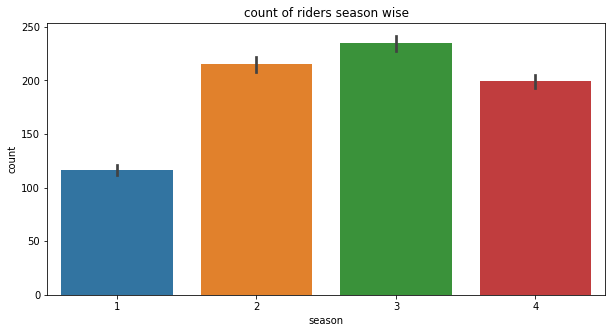

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,x = 'season',y = 'count')
plt.title('count of riders season wise')
plt.show()

**INSIGHT:** here we can see that in season of fall the number of riders are more as compared to other season also in summer season number of users are more.

**RECOMMENDATION:** arrange more number of bikes  on location in fall and summer seasons.

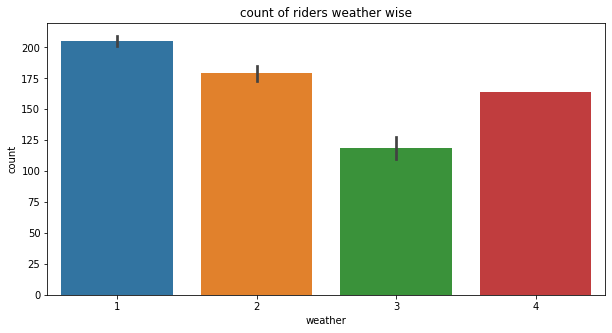

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,x = 'weather',y = 'count')
plt.title('count of riders weather wise')
plt.show()

from above graph we can infer that  Clear, Few clouds, partly cloudy, partly cloudy weather demand for yulu bicycles is high.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist in this type of weather demand for yulu bicycles decreses slightly.

**Insight** : except Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds this type of weather in all weather types demand for yulu bikes is high.

**recommendations** : we recommend except  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds this type of weather bikes has to be in more number on location.

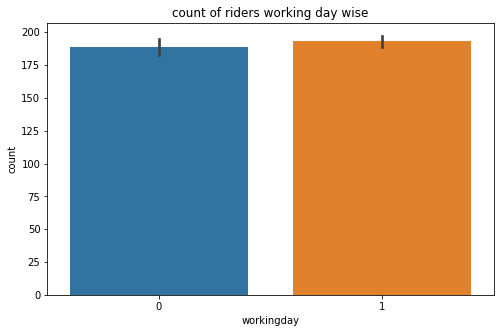

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = df,x = 'workingday',y = 'count')
plt.title('count of riders working day wise')
plt.show()

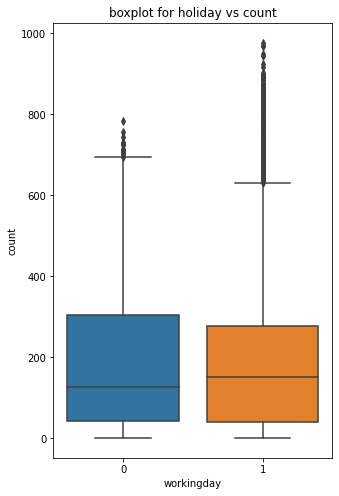

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(data = df,x = 'workingday',y = 'count')
plt.title('boxplot for holiday vs count')
plt.show()

from above countplot we can infer that number of users on working day and non working day are almost same.

**INSIGHT :** we can infer that median for number of users for bikes are independent of working day. but we can see more number of outliers in count on working days.

**RECOMMENDATION :** we recommend to arrange more number of bikes on working days since there is more number of outliers on these days in count of users .

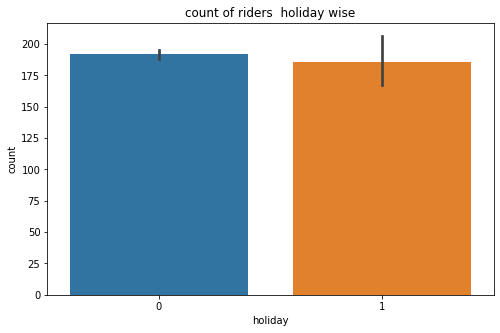

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="holiday", y="count")

plt.title('count of riders  holiday wise')
plt.show()

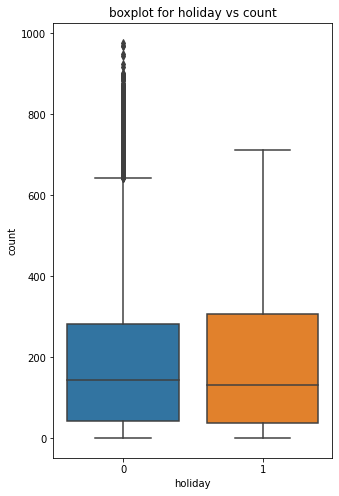

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(data = df,x = 'holiday',y = 'count')
plt.title('boxplot for holiday vs count')
plt.show()

from above countplot we can infer that numbe of yulu bikes users are independent of weather it is holiday or not but also we can seen more variation in number of user in holiday days .

insight : number of riders are independent of holidays but we can observe more variation on non holidays in number of users.

recomendations : we recommend to arrange more yulu bikes on locations on non holiday days since the outliers in count is more.

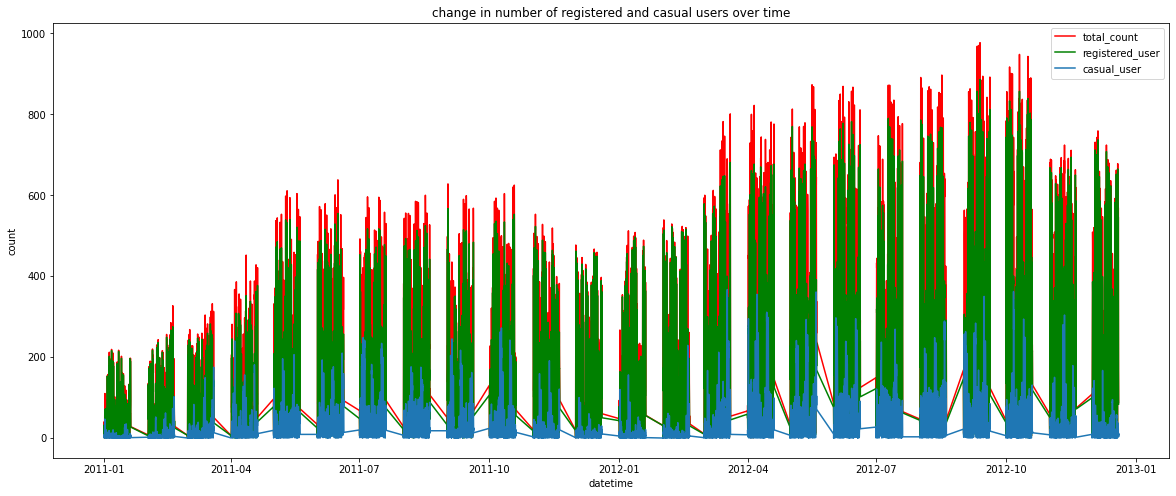

In [ ]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df,x = 'datetime',y = 'count',color = 'r')
sns.lineplot(data = df,x = 'datetime',y = 'registered',c = 'g')
sns.lineplot(data = df,x = 'datetime',y = 'casual')
plt.legend(['total_count','registered_user','casual_user'])
plt.title('change in number of registered and casual users over time')
plt.show()

from above graph we can see that most of the users of yulu are registered users and precentage of casual user is very less.

**insight** - most of the users are register users the percentage of casual users is very low as comapared to register users .but during 2012-04 to 2012-10
this period deamand suddenly rised for yulu bikes and during this same period number of casual users also rise drastically . if there is perticular event during this period we must have to keep eye on this types of event.

**recommendations :** check on ground level what are the events that caused sudden rise in demand for yulu bikes during period 2012-04 - 2012-10 and keep an eye on this type of events.this same pattern occure in 2011-01 - 2011-07 period this sapn of 6 months can potentially increse yulu bikes revenue if they able to identify this events.

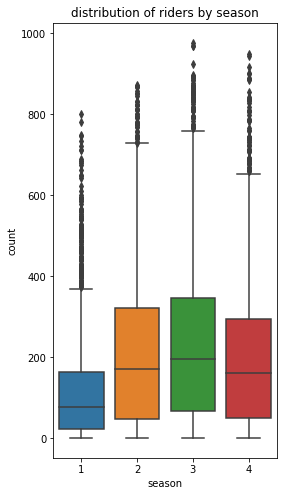

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(data = df,x = 'season',y = 'count')
plt.title('distribution of riders by season')
plt.show()

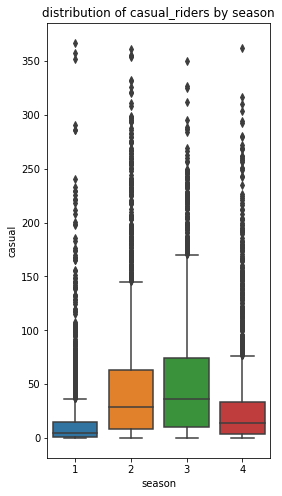

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(data = df,x = 'season',y = 'casual')
plt.title('distribution of casual_riders by season')
plt.show()

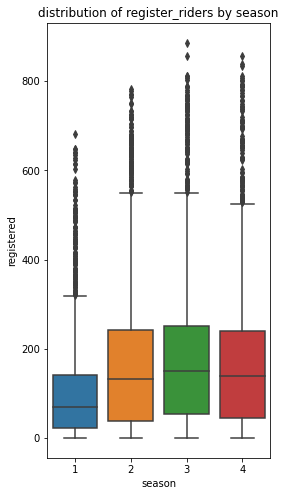

In [ ]:
plt.figure(figsize = (4,8))
sns.boxplot(data = df,x = 'season',y = 'registered')
plt.title('distribution of register_riders by season')
plt.show()

the median number of total riders are highest in fall season in all three categories.

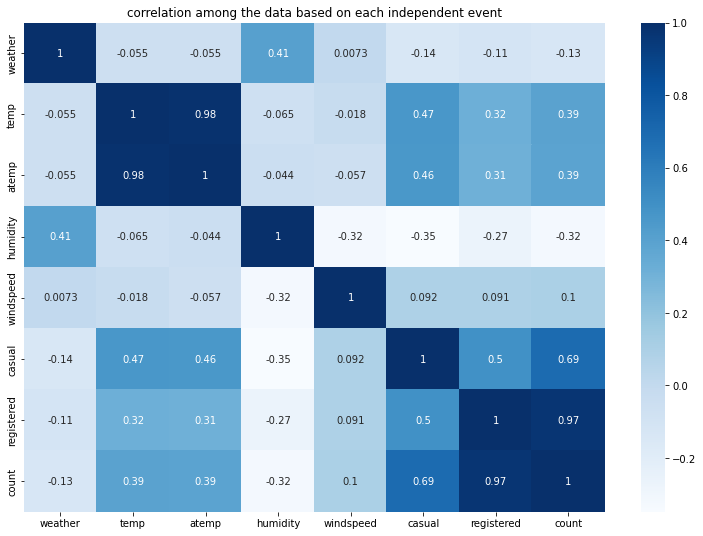

In [ ]:
plt.figure(figsize = (13,9))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('correlation among the data based on each independent event')
plt.show()

**INSIGHT :** as we can observe correlation between registered users and count is high (0.97) hence can say that regisered users are repetative custumers of bikes.

**RECOMMENDATIONS :** we recommend to focus on incresing number of register users it may help to gain more repetative orders that will positively affect the  revenues.

# Two T-test sample test to check effect of working day and non working day

**let's setup hypothesis for the effect of working day and non working day for count of users**


*   Ho : working day has no effect on number of users . 
*   H1 : wroking day has effected number of users.



**significance level** = 0.05 or  5%

**test static** = two sample t test

In [ ]:
working_day_no = np.array(df[df.workingday == 0]['count'])
working_day_yes = np.array(df[df.workingday == 1]['count'])

In [ ]:
print(f'len working_day_no {len(working_day_no)}')
print(f'len working_day_yes {len(working_day_yes)}')
print(np.var(working_day_no),np.var(working_day_yes))
print(np.var(working_day_yes)/np.var(working_day_no))

len working_day_no 3474
len working_day_yes 7412
30171.346098942427 34040.69710674686
1.1282458858519429


The ratio of the larger sample variance to the smaller sample variance 1.12, which is less than 4. This means we can assume that the population variances are equal.

In [ ]:
stats.ttest_ind(a=working_day_no, b=working_day_yes,equal_var = True)


Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since, pvalue(0.226) is greater than Significance Level(α) i.e 0.05, we fail to reject the 
null hypothesis that - working day has no effect on the number of electric cycles rented. 
This implies that at 95% confidence level, the mean of number of riders on non-working day is 
statistically not different from the mean number of riders on working day.

# Effect of holidays and non holidays on number of yulu rented



*   **Ho** : Holiday has no effect on the number of electric cycles rented
*   **H1**: Holiday has effect on the number of electric cycles rented


**significance level** = 5% or 0.05

**test static** - two sample t-test



In [ ]:
holiday_no = np.array(df[df.holiday == 0]['count'])
holiday_yes = np.array(df[df.holiday == 1]['count'])

In [ ]:
print(f'len holiday_no {len(holiday_no)}')
print(f'len holiday_yes {len(holiday_yes)}')
print(np.var(holiday_no),np.var(holiday_yes))
print(np.var(holiday_yes)/np.var(holiday_no))

len holiday_no 10575
len holiday_yes 311
32943.901106481346 28233.99150132856
0.8570324264291164


The ratio of the larger sample variance to the smaller sample variance 0.85, which is less than 4. This means we can assume that the population variances are equal.

In [ ]:
stats.ttest_ind(a = holiday_no, b= holiday_yes,equal_var = True)


Ttest_indResult(statistic=0.5626388963477119, pvalue=0.5736923883271103)

**insight :** as we can see , p-value(0.57) > slpha(0.05) hence we are fail to reject null hypothesis that - holiday has no effect on the number of electric cycles rented.

This implies that at 95% confidence level, the mean of number of riders on non-holiday is 
statistically not different from the mean number of riders on holiday.

# No. of cycles rented similar or different in different weather

**Ho**: Season has no effect on the number of electric cycles rented

**H1**: Season has effect on the number of electric cycles rented

**Significance Level(α)**: 0.05 or 5%

**Test Statistic**: One Way ANOVA

In [ ]:
season_spring = np.array(df[df.season == 1]['count'])
season_summer = np.array(df[df.season == 2]['count'])
season_fall = np.array(df[df.season == 3]['count'])
season_winter = np.array(df[df.season == 4]['count'])

In [ ]:
from scipy.stats import f_oneway
f_oneway(season_spring,season_summer,season_fall,season_winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

Since, **pvalue(6.164843386499654e-149) < Significance Level(α) (0.05)**, we reject the 
null hypothesis that - season has no effect on the number of electric cycles rented. 
This implies that at 95% confidence level, the mean of number of riders in different seasons is 
statistically different for atleast one season.


# number of cycles rented are simillar or different in different weather

**Ho**: Weather has no effect on the number of electric cycles rented

**H1**: Weather has effect on the number of electric cycles rented

**Significance Level(α)**: 0.05 or 5%

**Test Statistic**: One Way ANOVA

In [ ]:
clear_weather = np.array(df[df.weather == 1]['count'])
cloudy_weather = np.array(df[df.weather == 2]['count'])
light_snow = np.array(df[df.weather == 3]['count'])
heavy_rain = np.array(df[df.weather == 4]['count'])

In [ ]:
f_oneway(clear_weather,cloudy_weather,light_snow,heavy_rain)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

**insight:** Since, pvalue(5.482069475935669e-42) is lesser than Significance Level(α) i.e 0.05, we reject the 
null hypothesis that - weather has no effect on the number of electric cycles rented. 
This implies that at 95% confidence level, the mean of number of riders in different weather is 
statistically different for atleast one weather

# Test of normality

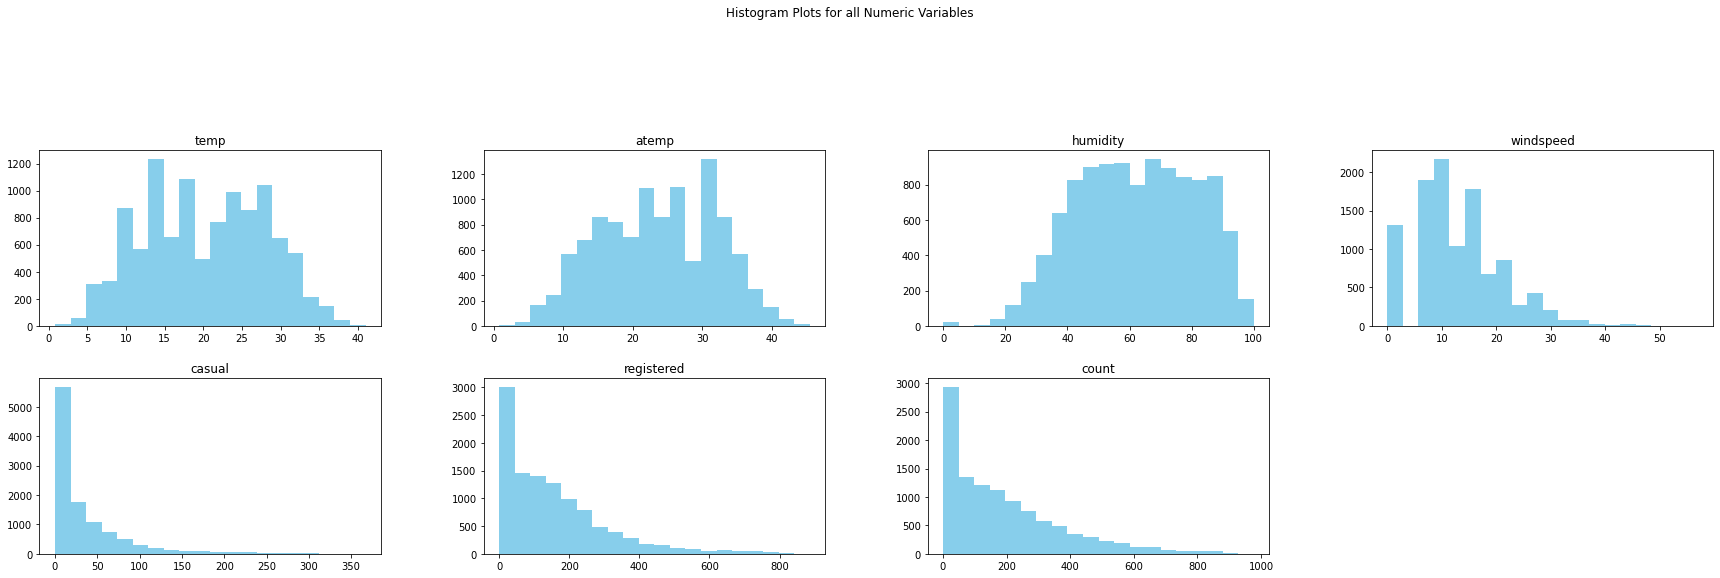

In [ ]:
# histogram
yulu_cont = df[['temp','atemp','humidity','windspeed','casual','registered','count']]
yulu_cont.hist(layout = (5,4), color = 'skyblue', figsize = (30,20), grid = False, bins = 20)
plt.suptitle('Histogram Plots for all Numeric Variables')
plt.show()

we can see above that distribution for all the numeric variables is not normal and its skewed.

# QQ plot

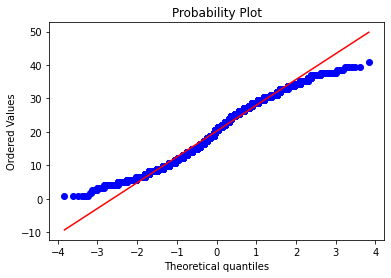

In [ ]:
import statsmodels.api as sm
import pylab as py

stats.probplot(yulu_cont['temp'], dist="norm", plot=plt)
plt.show()

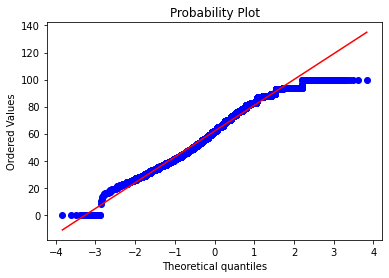

In [ ]:
stats.probplot(yulu_cont['humidity'], dist="norm", plot=plt)
plt.show()

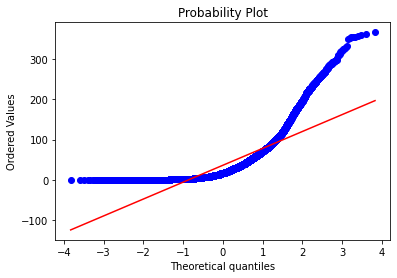

In [ ]:
stats.probplot(yulu_cont['casual'], dist="norm", plot=plt)
plt.show()

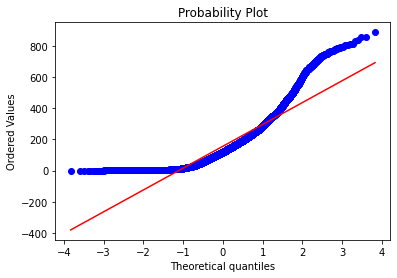

In [ ]:
stats.probplot(yulu_cont['registered'], dist="norm", plot=plt)
plt.show()

**insights :** From the QQ-Plot we observe that none of the variables is looking straight, hence showing
deviation from normal distribution.

#Levene's Test

**Levene's Test for equality of variance for number of riders for 4 different seasons**

**Assumption:**
Samples collected from the population are independent of each other
The population data is approximately normal in distribution

**Ho**: Variance is equal for all seasons

**H1**: Variance is not equal for all seasons (atleast one of the season has a variance different from the others)

**Significance Level(α):** 0.05 or 5%

**Levene's Test-Statistic:** As the data for all the seasons is skewed in distribution, we will use the median for test statistics.

In [ ]:
from scipy.stats import levene
levene(clear_weather , cloudy_weather , light_snow , heavy_rain, center ='median')

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

since p - value(3.504937946833238e-35) < significance level(0.05) we fail to accept null hypothesis  that is - varience is equal for all seasons.

This implies that at 95% confidence level, Variance is not equal for all seasons, atleast one of
the season has a variance different from the others

# Recommendations:
*   As from 2 Sample T-test we have seen that holiday has no impact on the number 
of riders 
at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective 
of whether it is a holiday or not.

* As from 2 Sample T-test we have seen that working day has no impact on the number of riders 
at 95% confidence level, Yulu should run similar promotional-campaigns/offers irrespective of whether it is holiday or not.

* As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically 
different at 95% confidence level for different seasons, Yulu should have different strategies
for different seasons. Yulu should try to increase the riders in the months of fall and winter 
when the number of riders goes down considerably and maximize capacity utilization of e-bikes
in the months of summer and fall.

* As we have seen from Analysis of Variance(ANOVA), that mean number of riders is statistically 
different at 95% confidence level for different weathers, Yulu should have different strategies
for different weathers. Yulu should try to maximize the capacity utilization of e-bikes
when the weather is clear or partly clear.


* Yulu should perform demand forecasting as we have seen that there is trend and seasonality 
in the data. Better demand forecasting will lead to better capacity utilization of e-bikes
in different seasons.

* Yulu should also perform further investigation into the riders based on gender and age as 
insights into age bracket and gender would reveal a lot about the week on week capacity 
utilization on the type of customers preferring Yulu e-bikes